In [1]:
!pip install cobra
import cobra

In [2]:
import os
import pandas as pd 
import numpy as np 
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams #
from scipy import stats

import matplotlib.pyplot as plt

import cobra

from cobra.medium import minimal_medium

## Task 1

In [3]:
model = cobra.io.read_sbml_model('/content/RAW264_7.xml')

Streaming output truncated to the last 5000 lines.
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_D_c "D-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_D_e "D-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_D_x "D-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_L_c "L-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_L_e "L-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_ala_DASH_L_x "L-Alanine">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_alpa_hs_c "lysophosphatidic acid (homo sapiens)">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFor

In [4]:
max_growth = model.slim_optimize()
minimal_medium_aer = minimal_medium(model, max_growth)

In [5]:
medium = model.medium
medium["EX_o2_LPAREN_e_RPAREN_"] = 0.0
model.medium = medium

max_growth = model.slim_optimize()
minimal_medium_anaer = minimal_medium(model, max_growth)

In [6]:
medium

{'EX_Lcystin_LPAREN_e_RPAREN_': 1.0,
 'EX_arg_L_LPAREN_e_RPAREN_': 0.02375,
 'EX_chol_LPAREN_e_RPAREN_': 10000.0,
 'EX_cl_LPAREN_e_RPAREN_': 10000.0,
 'EX_glc_LPAREN_e_RPAREN_': 0.2718,
 'EX_gln_L_LPAREN_e_RPAREN_': 0.0765,
 'EX_gly_LPAREN_e_RPAREN_': 0.1,
 'EX_h2o_LPAREN_e_RPAREN_': 10000.0,
 'EX_h_LPAREN_e_RPAREN_': 10000.0,
 'EX_his_L_LPAREN_e_RPAREN_': 0.1,
 'EX_ile_L_LPAREN_e_RPAREN_': 0.1,
 'EX_inost_LPAREN_e_RPAREN_': 0.1,
 'EX_leu_L_LPAREN_e_RPAREN_': 0.03622,
 'EX_lys_L_LPAREN_e_RPAREN_': 0.1,
 'EX_met_L_LPAREN_e_RPAREN_': 0.1,
 'EX_na1_LPAREN_e_RPAREN_': 10000.0,
 'EX_nh4_LPAREN_e_RPAREN_': 10000.0,
 'EX_o2_LPAREN_e_RPAREN_': 0.0,
 'EX_ocdca_LPAREN_e_RPAREN_': 0.1,
 'EX_ocdcea_LPAREN_e_RPAREN_': 0.0192,
 'EX_phe_L_LPAREN_e_RPAREN_': 0.1,
 'EX_pi_LPAREN_e_RPAREN_': 10000.0,
 'EX_pyr_LPAREN_e_RPAREN_': 0.0568,
 'EX_ribflv_LPAREN_e_RPAREN_': 1.0,
 'EX_ser_L_LPAREN_e_RPAREN_': 0.1,
 'EX_so4_LPAREN_e_RPAREN_': 10000.0,
 'EX_thr_L_LPAREN_e_RPAREN_': 0.1,
 'EX_trp_L_LPAREN_e_RPAREN_

In [7]:
frame = { 'Names': minimal_medium_aer.index,'Aerobic': minimal_medium_aer, 'Anaerobic': minimal_medium_anaer }
result = pd.DataFrame(frame)
print(result)

                                                   Names   Aerobic  Anaerobic
EX_Lcystin_LPAREN_e_RPAREN_  EX_Lcystin_LPAREN_e_RPAREN_  0.316246   0.289174
EX_arg_L_LPAREN_e_RPAREN_      EX_arg_L_LPAREN_e_RPAREN_  0.023750   0.023750
EX_chol_LPAREN_e_RPAREN_        EX_chol_LPAREN_e_RPAREN_  0.001573   0.000727
EX_glc_LPAREN_e_RPAREN_          EX_glc_LPAREN_e_RPAREN_  0.271800   0.271800
EX_gln_L_LPAREN_e_RPAREN_      EX_gln_L_LPAREN_e_RPAREN_  0.076500   0.076500
EX_gly_LPAREN_e_RPAREN_          EX_gly_LPAREN_e_RPAREN_  0.100000   0.100000
EX_h2o_LPAREN_e_RPAREN_          EX_h2o_LPAREN_e_RPAREN_  0.065385   0.298020
EX_his_L_LPAREN_e_RPAREN_      EX_his_L_LPAREN_e_RPAREN_  0.100000   0.100000
EX_ile_L_LPAREN_e_RPAREN_      EX_ile_L_LPAREN_e_RPAREN_  0.090695   0.004891
EX_inost_LPAREN_e_RPAREN_      EX_inost_LPAREN_e_RPAREN_  0.000153   0.000071
EX_leu_L_LPAREN_e_RPAREN_      EX_leu_L_LPAREN_e_RPAREN_  0.028791   0.013307
EX_lys_L_LPAREN_e_RPAREN_      EX_lys_L_LPAREN_e_RPAREN_  0.0634

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

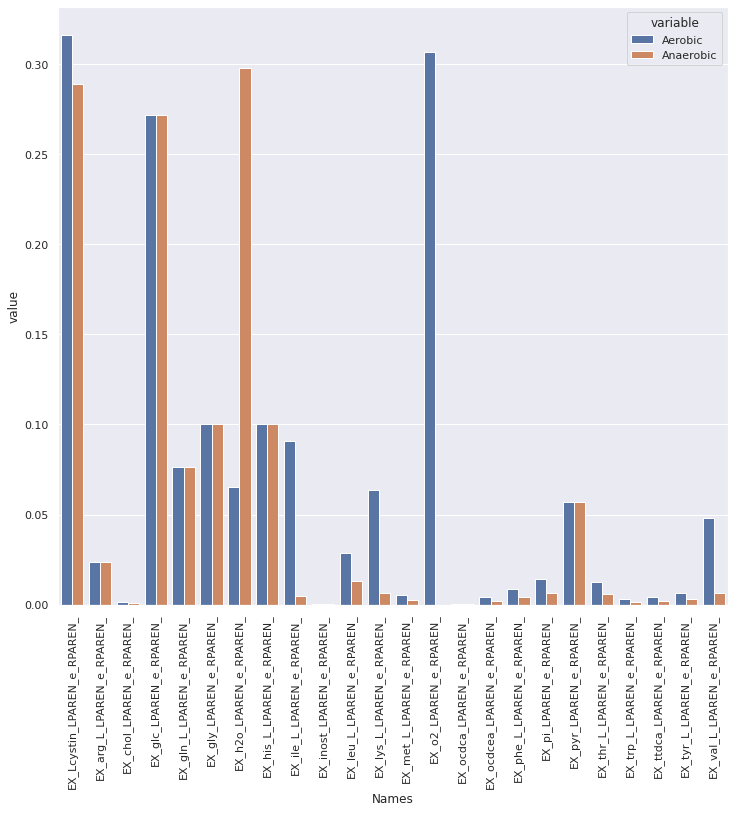

In [14]:
df = pd.melt(
    frame = result,
    id_vars = "Names")

sns.set(rc={'figure.figsize':(12,11)})
sns.barplot(x='Names', y='value',
            hue="variable", data=df)
plt.xticks(rotation = 90)

## Task 2

In [35]:
#!pip  install sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from termcolor import colored as cl
from sklearn.datasets import load_breast_cancer

In [36]:
X_var, y_var = load_breast_cancer(return_X_y=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_var, 
                                                    y_var, 
                                                    test_size = 0.3)

In [38]:
scaler = StandardScaler().fit(X_train)

In [39]:
lr = LogisticRegression().fit(scaler.transform(X_train), y_train)
print(classification_report(y_test, lr.predict(scaler.transform(X_test))))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [40]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
print(classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        64
           1       0.97      0.94      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [57]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01792793, 0.        , 0.        ,
       0.00806757, 0.        , 0.        , 0.00393387, 0.00264074,
       0.        , 0.        , 0.        , 0.00481223, 0.        ,
       0.67495886, 0.08609862, 0.        , 0.00537838, 0.01066636,
       0.00956156, 0.0168208 , 0.14869771, 0.        , 0.01043538])

## Task 3

In [61]:
!pip install Bio
from Bio import Phylo, SeqIO
from Bio import AlignIO
from Bio import motifs
from Bio.Seq import Seq

     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 2.3MB 39.4MB/s 


In [62]:
tree = Phylo.read("/content/aeromonade.dnd", "newick")
Phylo.draw_ascii(tree)

                                    ______________________________ LC499765.1
  _________________________________|
 |                                 | MN493074.1
 |
_|                     ________ MG063201.1
 |____________________|
 |                    | NR_112838.1
 |
 | NR_044845.1



In [63]:
align = AlignIO.read("/content/aeromonade.aln", "clustal")
print(align)

Alignment with 5 rows and 1537 columns
--------------------------------------GACTA-...--- MG063201.1
------------------------------------------A-...--- NR_112838.1
-GAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAA...C-- NR_044845.1
--------------------ATTGAACGCTGGCGGCAGGCCTAA...--- LC499765.1
AGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAA...CTT MN493074.1
